# Project - Estimating the likelihood for an affair

## Details

* Student ID
...

## Description of the project

In this project, I was interested in answering the question "How likely is somebody to have an extramartial affair. To answer this question, I have decided a survey of 8 features and 1 target variable as follows:

* sex factor indicating gender.
* age numeric variable coding age in years.
* ym numeric variable coding number of years married.
* child factor. Are there children in the marriage?
* religious numeric variable coding religiousness: 1 = anti, 2 = not at all, 3 = slightly, 4 = somewhat, 5 = very.
* education numeric variable coding level of education: 9 = grade school, 12 = high school graduate, 14 = some college, 16 = college graduate, 17 = some graduate work, 18 = master’s degree, 20 = Ph.D., M.D., or other advanced degree.
* occupation numeric variable coding occupation according to [Hollingshead classification](https://dictionary.fitbir.nih.gov/portal/publicData/dataElementAction!view.action?dataElementName=HollingsheadJobClassCat&publicArea=true) (reverse numbering).
* rate numeric variable coding self rating of marriage: 1 = very unhappy, 2 = somewhat unhappy, 3 = average, 4 = happier than average, 5 = very happy

The target variable - nbaffairs - was the number of extramarital encounters during the last year

In [1]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/AUP-CS2091/Week-10/master/Fair.csv')

data.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,1,35,10.0000,0,3,18,7,4,0
1,0,28,5.0000,0,4,14,6,4,0
2,0,30,15.0000,1,1,12,1,4,0
3,1,66,20.0000,1,5,18,6,5,0
4,1,22,0.7497,0,2,17,6,3,0


I first needed to clean a bit the data, change categories into numbers and deal with missing values.

In [2]:
data['sex'] = data['sex'].astype('category').cat.codes
data['child'] = data['child'].astype('category').cat.codes

## Data Exploation

I wanted to better understand the distribution of the data and significance of different features

In [3]:
data.describe()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
count,601.000000,601.00000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,0.475874,32.91015,10.049069,0.715474,3.116473,16.166389,4.194676,3.931780,1.455907
std,0.499834,10.77738,8.419986,0.451564,1.167509,2.402555,1.819443,1.103179,3.298758
min,0.000000,17.00000,0.000000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,0.000000,25.00000,3.000000,0.000000,2.000000,14.000000,3.000000,3.000000,0.000000
50%,0.000000,31.00000,8.000000,1.000000,3.000000,16.000000,5.000000,4.000000,0.000000
75%,1.000000,37.00000,16.000000,1.000000,4.000000,18.000000,6.000000,5.000000,0.000000
max,1.000000,80.00000,29.000000,1.000000,5.000000,20.000000,7.000000,5.000000,12.000000


As can be seen, gender is distributed almost evenly between females and males with a slight advantage to females. Here is the precise distribution

In [4]:
females = len(data[data['sex'] == 0])
female_dist = females / len(data)
print(female_dist)

print(len(data[data['age'] == 37]))

0.5241264559068219
19


The distribution of females in the US is 50.8% of the population in 2010 (see [this document](https://www.census.gov/prod/cen2010/briefs/c2010br-03.pdf)) so we have a relatively balaned dataset with regard to this feature.

We can similarly see that 71% have children. I found in [this document](https://www.census.gov/prod/2013pubs/p20-570.pdf), that out of 55,519,648 married couples, 24,056,766 had children in the US, which gives us

In [5]:
print('{}%'.format(24056766/55519648*100))

43.33018465823126%


only. One should, of course, take into account the number of children and the years of being married when trying to evaluate the distribution and this is outside of the scope of our course.

For the rest of the features, I need to use different graphs for better understanding the distribution.

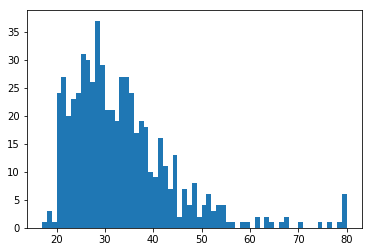

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

_ = plt.hist(data['age'], 63)

I have compared it with [this distribution](https://www.census.gov/prod/2005pubs/p70-97.pdf). Unfortunately, the distribution does not talk about ages of people who are married but the age when they got married. Luckily, I found I can engineer my data to produce this information as follows



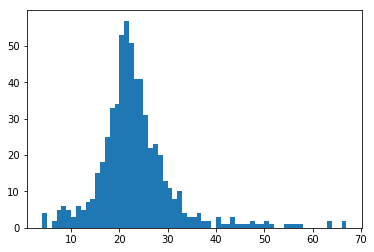

In [7]:
# age when married
data['awm'] = data.apply(lambda x: x['age'] - x['ym'], axis=1)

_ = plt.hist(data['awm'], 63)

The data is not "smooth" enough and can confuse a modeling technique because of ....
A possible "smoothing" of the distribution is by assigning the ages into few categories

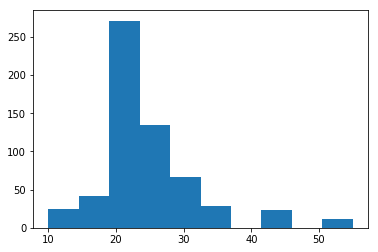

In [8]:
data['age_cats'] = data.apply(lambda x: 10 if x['awm'] < 11
         else 15 if x['awm'] > 10 and x['awm'] < 16
         else 20 if x['awm'] > 15 and x['awm'] < 21
         else 22 if x['awm'] > 20 and x['awm'] < 23
         else 24 if x['awm'] > 22 and x['awm'] < 25
         else 26 if x['awm'] > 24 and x['awm'] < 27
         else 30 if x['awm'] > 26 and x['awm'] < 31
         else 35 if x['awm'] > 30 and x['awm'] < 36
         else 45 if x['awm'] > 35 and x['awm'] < 50
         else 55, axis = 1)

_ = plt.hist(data['age_cats'], 10)

Similarly to age, I used the [same document](https://www.census.gov/prod/2005pubs/p70-97.pdf) for the duration of marriage...

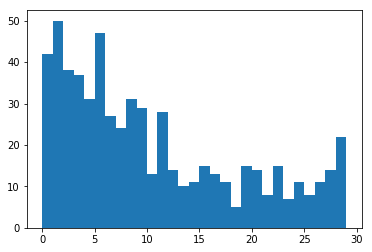

In [9]:
_ = plt.hist(data['ym'], 29)

I go on and show the distribution of the rest of the features and try to explain any big anomality (of course, given a small data set, the anomalities will be bigger) as much as I can. I engineer features which are easier to compare to censuses I found online and smooth them when necessary.

I now check the distribution of the number of affairs

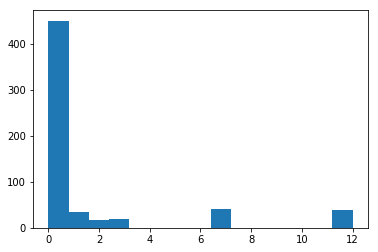

In [10]:
_ = plt.hist(data['nbaffairs'], 15)

The above histogram hints that it will be much more interesting in checking if an affair took place than to check the number of affairs. I do the required normalization

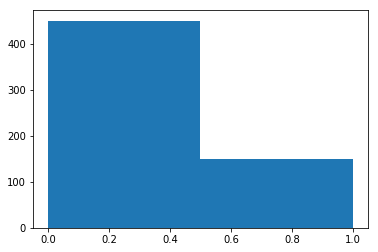

In [11]:
data['has_affair'] = data.apply(lambda x: 0 if x['nbaffairs'] == 0
         else 1, axis = 1)

_ = plt.hist(data['has_affair'], 2)

## Modeling

After a first attempt at engineering the data (and understanding I will probably need to reiterate the features engineering step in order to try to improve my models), I can try to build the models.

First, separating the set of features and target variable.We should also remove the 'nbaffairs' from X because it is highly correlated and we dont have access to it in future cases.

In [12]:
X = data.loc[:, data.columns != 'has_affair']
del X['nbaffairs']
y = data['has_affair']

Next, I put aside 20% of the data for testing and comparing the set of final models I will obtain at the end.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Since it is a classification problem, we can try first to use classification trees and to get the best parameters

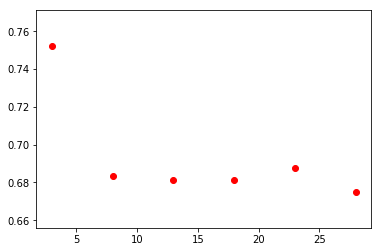

In [14]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

import numpy as np

rng = np.arange(3,30,5)
acc = []
for s in rng:
    model = DecisionTreeClassifier(max_depth=s)
    acc.append(cross_val_score(model, X_train, y_train).mean())

_ = plt.scatter(rng, acc, c='red')

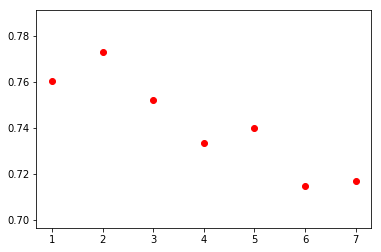

In [15]:
rng = np.arange(1,8,1)
acc = []
for s in rng:
    model = DecisionTreeClassifier(max_depth=s)
    acc.append(cross_val_score(model, X_train, y_train).mean())

_ = plt.scatter(rng, acc, c='red')

If I choose to restrict the model with max_depth, 2 is apparently the best value in order to avoid over-fitting.

I obtain the accuracy score on the test set while building a model using the whole training set

In [16]:
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train,y_train)
accuracy_score(y_test,model.predict(X_test))

0.71900826446280997

I continue with evaluating and comparing models with different parameters and techniques, while closely monitoring the documentation! I also try to remove features as some methods (i.e. nearest neighbors) are more sensitive to that.

At the end, I choose the best model I could find and I want to know if I had enough data. For that, I plot the lurning_curves of each of the modeling techniques. Maybe a bit more data for logistic regression would give me much better classification, or for trees?

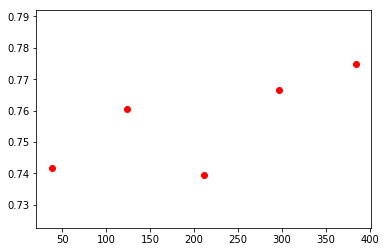

In [17]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)
plt.scatter(train_sizes, np.mean(test_scores, axis=1), c='red')
mean_values = np.mean(test_scores, axis=1)

It seems that our model can still benefit from more data but that this is not that crucial, i.e. we cans till get interesting results with the amount of data we have so far.

We are still not done, can we find interesting patterms using an unsupervised technique? 

In [18]:
data.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,awm,age_cats,has_affair
0,1,35,10.0000,0,3,18,7,4,0,25.0000,26,0
1,0,28,5.0000,0,4,14,6,4,0,23.0000,24,0
2,0,30,15.0000,1,1,12,1,4,0,15.0000,15,0
3,1,66,20.0000,1,5,18,6,5,0,46.0000,45,0
4,1,22,0.7497,0,2,17,6,3,0,21.2503,22,0


In [29]:
from sklearn.cluster import AgglomerativeClustering

clusters = AgglomerativeClustering(n_clusters=10)
arr = clusters.fit_predict(data[['age', 'child', 'education', 'occupation', 'sex']])

data['cluster'] = arr

data.sort_values('cluster')

data.groupby('cluster').mean()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,awm,age_cats,has_affair
cluster,,,,,,,,,,,,
0,0.441176,41.411765,18.692401,0.926471,3.500000,15.514706,4.132353,3.397059,2.235294,22.719363,24.632353,0.308824
1,0.555556,50.222222,19.400000,0.888889,3.555556,15.955556,4.755556,3.822222,2.200000,30.822222,33.177778,0.333333
2,0.324561,21.649123,2.247016,0.289474,2.842105,15.043860,3.894737,4.324561,0.710526,19.402107,20.464912,0.157895
3,0.666667,78.111111,19.666667,0.888889,3.444444,16.000000,5.000000,3.333333,0.000000,58.444444,53.888889,0.000000
4,0.166667,28.023810,7.391861,0.857143,3.226190,14.428571,2.000000,3.880952,1.190476,20.631949,21.619048,0.238095
5,0.594203,32.565217,9.869565,0.797101,3.115942,17.811594,5.318841,3.855072,2.130435,22.695652,24.072464,0.318841
6,0.836364,37.290909,15.745455,0.909091,3.163636,19.090909,5.672727,3.781818,2.254545,21.545455,22.945455,0.309091
7,0.604167,26.645833,3.892342,0.520833,2.697917,17.437500,5.031250,4.145833,1.062500,22.753492,23.520833,0.229167
8,1.000000,64.666667,17.777778,1.000000,3.666667,18.000000,5.222222,4.000000,0.222222,46.888889,48.333333,0.111111


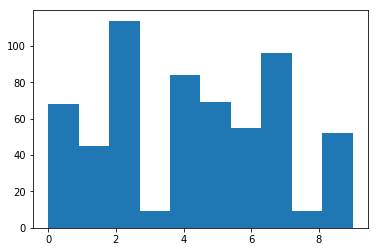

In [31]:
_ = plt.hist(data['cluster'], 10)

## Conclusion

I have tried to find the likelihood of a person to have an extramarital affair taking into accounts different features. After trying out all techniques learned in class, my conclusion is that ...